### **Task 13 Name - Harsh Shah Referral id - SIRSS1200**

In [ ]:

import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from keras.constraints import maxnorm
from keras.utils import np_utils

In [ ]:
from keras.datasets import cifar10

In [ ]:

(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [ ]:

print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
# Normalization needs to be done here

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
class_num=y_test.shape[1]

In [ ]:
model=Sequential()

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [ ]:
model.add(Conv2D(32,(3,3),input_shape=x_train.shape[1:],padding='same'))
model.add(Activation('relu'))

In [ ]:
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
# Another convoultional layer

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
# Repeating the same 
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
# Need to flatter for 1D 

model.add(Flatten())
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(256,kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Dense(256,kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [ ]:

epochs=25
optimizer='adam'

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [ ]:

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)       

In [ ]:
seed = 21 #random
numpy.random.seed(seed)
result=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=64)

Epoch 1/25
782/782 [==============================] - 12s 12ms/step - loss: 1.8952 - accuracy: 0.3481 - val_loss: 1.3079 - val_accuracy: 0.5272
Epoch 2/25
782/782 [==============================] - 8s 11ms/step - loss: 1.1931 - accuracy: 0.5719 - val_loss: 0.9690 - val_accuracy: 0.6568
Epoch 3/25
782/782 [==============================] - 8s 11ms/step - loss: 0.9507 - accuracy: 0.6639 - val_loss: 0.7717 - val_accuracy: 0.7267
Epoch 4/25
782/782 [==============================] - 8s 11ms/step - loss: 0.8361 - accuracy: 0.7054 - val_loss: 0.7721 - val_accuracy: 0.7272
Epoch 5/25
782/782 [==============================] - 8s 10ms/step - loss: 0.7545 - accuracy: 0.7348 - val_loss: 0.6460 - val_accuracy: 0.7783
Epoch 6/25
782/782 [==============================] - 8s 11ms/step - loss: 0.7034 - accuracy: 0.7539 - val_loss: 0.6747 - val_accuracy: 0.7599
Epoch 7/25
782/782 [==============================] - 8s 11ms/step - loss: 0.6582 - accuracy: 0.7674 - val_loss: 0.6057 - val_accuracy: 0.787

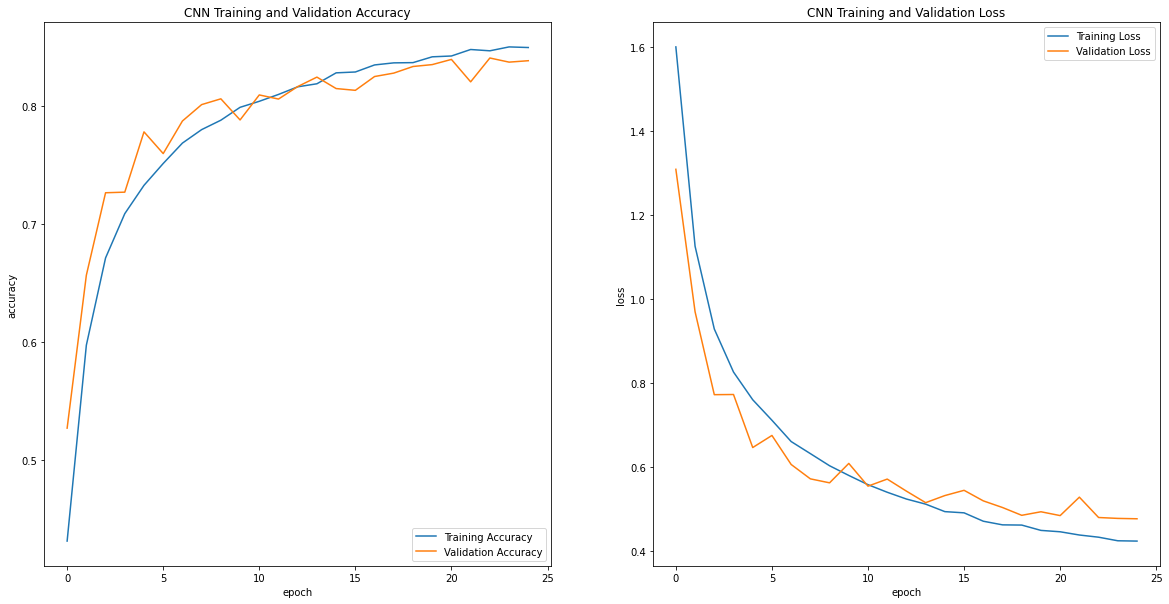

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("CNN Training and Validation Accuracy")
plt.plot(result.history["accuracy"], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot( result.history["loss"], label='Training Loss')
plt.plot( result.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4765 - accuracy: 0.8386
Test loss: 0.47646400332450867
Test accuracy: 0.8385999798774719
